## kaggle 데이터 연습

In [23]:
import pandas as pd 

train = pd.read_csv("./test_data/kaggle/train.csv")
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [12]:
df = pd.read_csv("./test_data/kaggle/train.csv")


In [6]:
train.shape

(11504798, 12)

## 문제 1. 
- 나이 그룹 분류 : 'Age_Group'이라는 새로운 열이 추가하도록 한다. Age를 'Young', 'Middle-Aged', 'Senior'으로 분류합니다.
- 분류 기준
  + 30세 이하는 Young
  + 50세 이하는 Middle-Aged
  + 그 외는 Senior로 분류

In [14]:
df['Age_Group'] = df['Age'].apply(lambda x: 'Young' if x >= 30 else ( 'Middle_Aged' if x <= 50 else 'Senior' ) ) 

## 문제 2. 
- 성별에 따른 연간 보험료 평균을 구하세요
    + 컬럼 : Annual_Premium, Gender

In [16]:
df.groupby('Gender')['Annual_Premium'].mean()
# code

Gender
Female    30270.952164
Male      30622.698524
Name: Annual_Premium, dtype: float64

## 문제 3. 
- Gender는 남성이면서, 이전에 보험에 가입하지 않았으며, 차량 연식 < 1년 이하인 값을 구하세요.
- 컬럼 정보 : Gender, Previously_Insured, Vehicle_Age

In [19]:
# code
g = df['Gender'] == 'Male'
p = df['Previously_Insured'] == 0
v = df['Vehicle_Age'] == '< 1 Year'
df.loc[g & p & v,:]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
42,42,Male,24,1,15.0,0,< 1 Year,Yes,38783.0,152.0,168,0,Middle_Aged
53,53,Male,24,1,7.0,0,< 1 Year,Yes,2630.0,152.0,189,0,Middle_Aged
56,56,Male,25,1,47.0,0,< 1 Year,Yes,30748.0,152.0,228,1,Middle_Aged
70,70,Male,33,1,33.0,0,< 1 Year,Yes,25961.0,152.0,100,0,Young
80,80,Male,21,1,28.0,0,< 1 Year,Yes,46250.0,156.0,275,0,Middle_Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504714,11504714,Male,26,1,41.0,0,< 1 Year,Yes,32160.0,152.0,111,0,Middle_Aged
11504717,11504717,Male,25,1,29.0,0,< 1 Year,Yes,29119.0,152.0,128,0,Middle_Aged
11504738,11504738,Male,24,1,17.0,0,< 1 Year,Yes,2630.0,160.0,105,0,Middle_Aged
11504739,11504739,Male,22,1,15.0,0,< 1 Year,Yes,32661.0,152.0,140,0,Middle_Aged


## 문제 4. 
- Policy_Sales_Channel이 7.0 또는 152.0인 데이터를 필터링 하세요

In [22]:
# code
df.loc[df['Policy_Sales_Channel'].isin([7.0,152.0]),:]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0,Middle_Aged
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0,Young
5,5,Female,31,1,47.0,1,< 1 Year,No,28150.0,152.0,197,0,Young
6,6,Male,23,1,45.0,1,< 1 Year,No,27128.0,152.0,190,0,Middle_Aged
8,8,Female,26,1,28.0,1,< 1 Year,No,31639.0,152.0,36,0,Middle_Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504790,11504790,Female,21,1,36.0,1,< 1 Year,No,38097.0,152.0,275,0,Middle_Aged
11504791,11504791,Female,31,1,32.0,1,< 1 Year,No,2630.0,152.0,204,0,Young
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1,Middle_Aged
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0,Middle_Aged


### 층화추출

In [7]:
stratified_sample = train.groupby('Response').apply(
    lambda x: x.sample(frac=0.001)
)

stratified_sample.to_csv("kaggle_test.csv", index=False)

C:\Users\pcuser\AppData\Local\Temp\ipykernel_20356\1063128695.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = train.groupby('Response').apply(


In [24]:
!pip install yfinance --upgrade --no-cache-dir

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 991.0 kB/s eta 0:00:03
     ------- -------------------------------- 0.6/3.0 MB 7.2 MB/s eta 0:00:01
     --------------------- ------------------ 1.6/3.0 MB 12.6 MB/s eta 0:00:01
     ---------------------------- ----------- 2.1/3.0 MB 14.7 MB/s eta 0:00:01
     ----------------------------------- ---- 2.6/3.0 MB 11.8 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 12.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [25]:
import yfinance as yf
data = yf.download("TSLA", start="2020-01-01",end="2024-07-02")

[*********************100%%**********************]  1 of 1 completed


In [26]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [68]:
import matplotlib.pyplot as plt

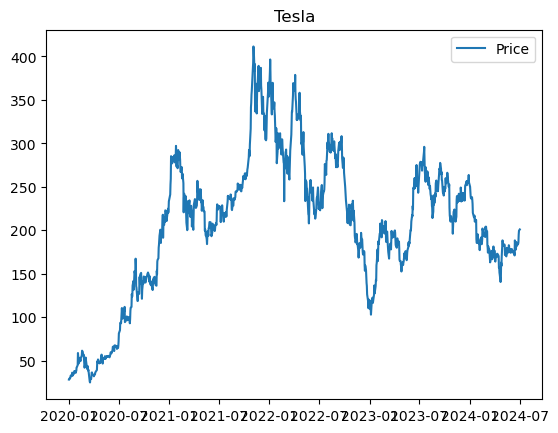

In [31]:
fig, ax = plt.subplots()

ax.plot(data['Open'])
ax.set_title('Tesla')
ax.legend(labels = ['Price'], loc='best')
plt.show()

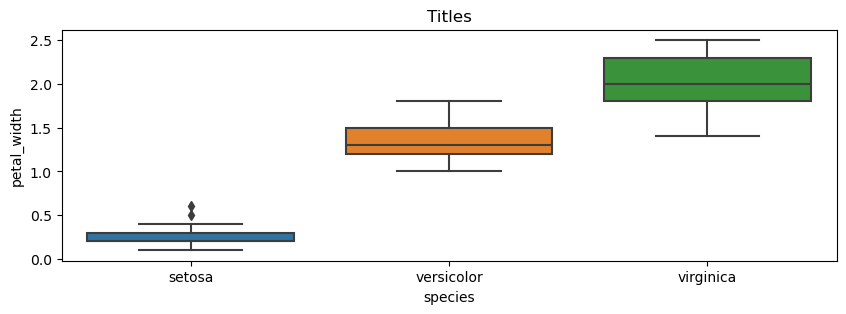

In [69]:
import seaborn as sns

iris = sns.load_dataset('iris')

fig,ax = plt.subplots(figsize=(10,3))
sns.boxplot(data=iris, x = 'species', y = 'petal_width', ax=ax)
ax.set_title('Titles')
plt.show()

## 막대 그래프 그려보기

### 1. 라이브러리 불러오기

In [70]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

### 2. 데이터 불러오기

In [71]:
tips = sns.load_dataset("tips")
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


### 3. 시각화 객체지향선언

#### 3-1. 기초 데이터

In [72]:
group_mean = tips.groupby('day',observed=False)['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending = False).index[0]
h_day = group_mean.idxmax()
h_day

'Sun'

In [73]:
h_mean = np.round(group_mean.sort_values(ascending = False).values[0],2)

In [74]:
h_day, h_mean

('Sun', 21.41)

In [83]:
import pandas as pd

pd.options.mode.chained_assignment = None  # 경고 메시지를 무시

# 나머지 코드


In [85]:
import warnings

# 경고 메시지 무시
warnings.filterwarnings("ignore", category=FutureWarning)

In [99]:
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

17.68
17.15
20.44
21.41
Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


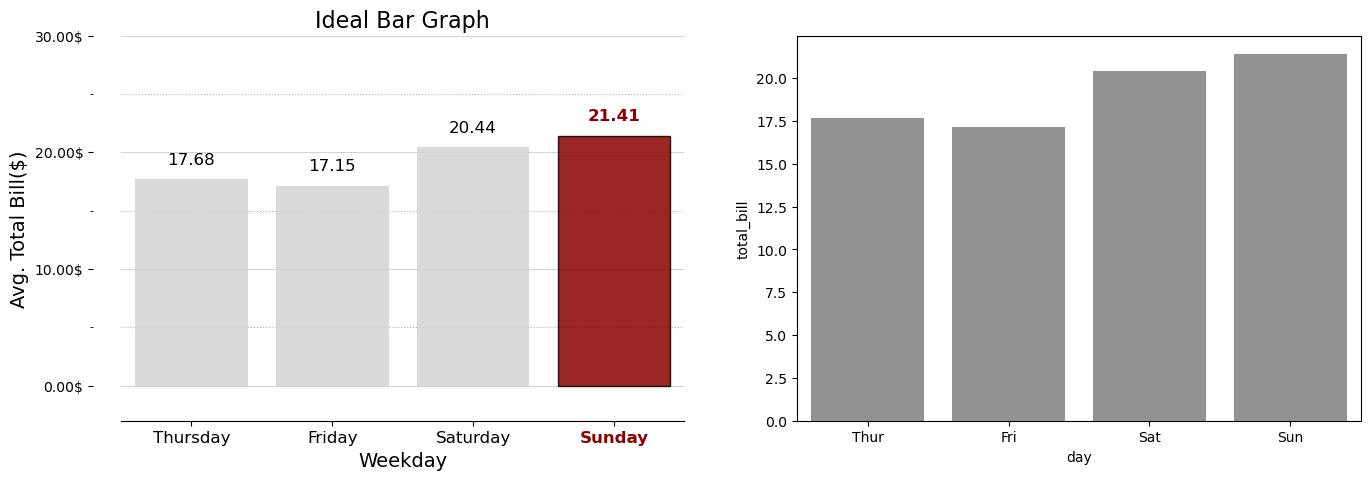

In [103]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(16,5))


ax0 = sns.barplot(x = 'day', y = 'total_bill',data= tips,
                  errorbar = None, 
                  color = 'lightgray', 
                  alpha = 0.85, # 투명도
                  zorder = 2,
                  ax= ax[0])

for p in ax0.patches:
    # print(p)
    fontweight = 'normal'
    color = 'k'
    height = np.round(p.get_height(),2)
    print(height)
    if h_mean == height:
        # sun이면 색상을 다르게 주겠다.
        fontweight = 'bold'
        color = 'darkred'
        p.set_facecolor(color)
        p.set_edgecolor('black')

    ax0.text(p.get_x() + p.get_width()/2., height+1.3, height, ha = 'center',
           size=12,
           fontweight=fontweight, color=color)
    
ax1 = sns.barplot(x = 'day', y = 'total_bill', data=tips,
                 errorbar = None,
                 color = 'gray',
                 alpha=0.85,
                 ax = ax[1])

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

plt.show()